In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/mrbeels/udemy-dashboard/main/udemy_output_All_Finance__Accounting_p1_p626.csv"

df1 = pd.read_csv(url)

In [3]:
df1.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [4]:
df1.tail(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.0,0.0,0.0,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.0,0.0,0.0,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.0,0.0,0.0,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.0,0.0,0.0,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN
13607,2935720,Acabou a Previdência e agora? - Volume 03,/course/acabou-a-previdencia-e-agora-volume-03/,True,0,0.0,0.0,0.0,0,False,14,0,2020-03-30T19:10:58Z,2020-04-02T16:33:32Z,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.shape

(13608, 20)

In [6]:
! pip install langdetect


     |████████████████████████████████| 983kB 2.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=ed11fd5cd21e82749a4b68734ab6940b00f30bb99e1c1c5482e7399a6f56a74f
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [7]:
from langdetect import detect

df1['language'] = df1['title'].apply(lambda x : detect(x))

In [8]:
df1.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,language
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640",pt
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en


In [9]:
language_stats = df1['language'].value_counts()

language_stats

en       11054
pt         535
es         371
de         339
fr         210
it         139
ca         132
nl          97
ja          89
tr          82
no          78
id          53
ru          41
ar          39
da          39
af          38
tl          37
ro          37
ko          33
sv          33
pl          18
he          17
et          15
vi          13
hr           9
sw           7
zh-cn        6
th           6
fi           6
ta           5
lt           5
hi           4
zh-tw        4
bg           4
hu           4
el           3
so           2
mr           2
cy           1
te           1
Name: language, dtype: int64

In [10]:
len(language_stats[language_stats < 15])

17

In [11]:
#Only English Courses
df2 = df1.copy()

df2 = df2[ df2['language'] == 'en']

df2.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,language
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en
5,1208634,Microsoft Power BI - A Complete Introduction [...,/course/powerbi-complete-introduction/,True,124180,4.56228,4.57676,4.57676,38093,False,275,0,2017-05-08T13:03:21Z,2017-05-15T18:48:54Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en


In [12]:
df2['language'].value_counts()

en    11054
Name: language, dtype: int64

In [13]:
df2.shape

(11054, 21)

In [14]:
#Check to remove if there are any null values in the table
df3 = df2.copy()

df3.dropna()

df3.shape

(11054, 21)

In [15]:
#Split Title into List of Strings
df3['raw_bow_list'] = df3['title'].apply(lambda x: x.split(" "))

df3.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,language,raw_bow_list
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[The, Complete, SQL, Bootcamp, 2020:, Go, from..."
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[Tableau, 2020, A-Z:, Hands-On, Tableau, Train..."
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[The, Complete, Financial, Analyst, Course, 2020]"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[An, Entire, MBA, in, 1, Course:Award, Winning..."
5,1208634,Microsoft Power BI - A Complete Introduction [...,/course/powerbi-complete-introduction/,True,124180,4.56228,4.57676,4.57676,38093,False,275,0,2017-05-08T13:03:21Z,2017-05-15T18:48:54Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[Microsoft, Power, BI, -, A, Complete, Introdu..."


In [16]:
#Getting the stopwords corpus
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
stop_cap = [i.capitalize() for i in stop]

print(stop_cap)

['I', 'Me', 'My', 'Myself', 'We', 'Our', 'Ours', 'Ourselves', 'You', "You're", "You've", "You'll", "You'd", 'Your', 'Yours', 'Yourself', 'Yourselves', 'He', 'Him', 'His', 'Himself', 'She', "She's", 'Her', 'Hers', 'Herself', 'It', "It's", 'Its', 'Itself', 'They', 'Them', 'Their', 'Theirs', 'Themselves', 'What', 'Which', 'Who', 'Whom', 'This', 'That', "That'll", 'These', 'Those', 'Am', 'Is', 'Are', 'Was', 'Were', 'Be', 'Been', 'Being', 'Have', 'Has', 'Had', 'Having', 'Do', 'Does', 'Did', 'Doing', 'A', 'An', 'The', 'And', 'But', 'If', 'Or', 'Because', 'As', 'Until', 'While', 'Of', 'At', 'By', 'For', 'With', 'About', 'Against', 'Between', 'Into', 'Through', 'During', 'Before', 'After', 'Above', 'Below', 'To', 'From', 'Up', 'Down', 'In', 'Out', 'On', 'Off', 'Over', 'Under', 'Again', 'Further', 'Then', 'Once', 'Here', 'There', 'When', 'Where', 'Why', 'How', 'All', 'Any', 'Both', 'Each', 'Few', 'More', 'Most', 'Other', 'Some', 'Such', 'No', 'Nor', 'Not', 'Only', 'Own', 'Same', 'So', 'Than', '

In [19]:
df4 = df3.copy()

df4['words_list'] = df4['raw_bow_list'].apply(lambda x: [item for item in x if item not in stop])
df4['words_list'] = df4['words_list'].apply(lambda x: [item for item in x if item not in stop_cap])
df4['words_list_s'] = df4['words_list'].apply(lambda x: [item.capitalize() for item in x])

df4.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,language,raw_bow_list,words_list,words_list_s
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[The, Complete, SQL, Bootcamp, 2020:, Go, from...","[Complete, SQL, Bootcamp, 2020:, Go, Zero, Hero]","[Complete, Sql, Bootcamp, 2020:, Go, Zero, Hero]"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[Tableau, 2020, A-Z:, Hands-On, Tableau, Train...","[Tableau, 2020, A-Z:, Hands-On, Tableau, Train...","[Tableau, 2020, A-z:, Hands-on, Tableau, Train..."
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[The, Complete, Financial, Analyst, Course, 2020]","[Complete, Financial, Analyst, Course, 2020]","[Complete, Financial, Analyst, Course, 2020]"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[An, Entire, MBA, in, 1, Course:Award, Winning...","[Entire, MBA, 1, Course:Award, Winning, Busine...","[Entire, Mba, 1, Course:award, Winning, Busine..."
5,1208634,Microsoft Power BI - A Complete Introduction [...,/course/powerbi-complete-introduction/,True,124180,4.56228,4.57676,4.57676,38093,False,275,0,2017-05-08T13:03:21Z,2017-05-15T18:48:54Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[Microsoft, Power, BI, -, A, Complete, Introdu...","[Microsoft, Power, BI, -, Complete, Introducti...","[Microsoft, Power, Bi, -, Complete, Introducti..."


In [20]:
df5 = df4.copy()

df5['words_str'] = df5['words_list'].apply(lambda x: ' '.join(x))
df5['words_str_s'] = df5['words_list_s'].apply(lambda x: ' '.join(x))
df5['keyword'] = df5['words_str_s']

df5.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,language,raw_bow_list,words_list,words_list_s,words_str,words_str_s,keyword
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[The, Complete, SQL, Bootcamp, 2020:, Go, from...","[Complete, SQL, Bootcamp, 2020:, Go, Zero, Hero]","[Complete, Sql, Bootcamp, 2020:, Go, Zero, Hero]",Complete SQL Bootcamp 2020: Go Zero Hero,Complete Sql Bootcamp 2020: Go Zero Hero,Complete Sql Bootcamp 2020: Go Zero Hero
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[Tableau, 2020, A-Z:, Hands-On, Tableau, Train...","[Tableau, 2020, A-Z:, Hands-On, Tableau, Train...","[Tableau, 2020, A-z:, Hands-on, Tableau, Train...",Tableau 2020 A-Z: Hands-On Tableau Training Da...,Tableau 2020 A-z: Hands-on Tableau Training Da...,Tableau 2020 A-z: Hands-on Tableau Training Da...
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[The, Complete, Financial, Analyst, Course, 2020]","[Complete, Financial, Analyst, Course, 2020]","[Complete, Financial, Analyst, Course, 2020]",Complete Financial Analyst Course 2020,Complete Financial Analyst Course 2020,Complete Financial Analyst Course 2020
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[An, Entire, MBA, in, 1, Course:Award, Winning...","[Entire, MBA, 1, Course:Award, Winning, Busine...","[Entire, Mba, 1, Course:award, Winning, Busine...",Entire MBA 1 Course:Award Winning Business Sch...,Entire Mba 1 Course:award Winning Business Sch...,Entire Mba 1 Course:award Winning Business Sch...
5,1208634,Microsoft Power BI - A Complete Introduction [...,/course/powerbi-complete-introduction/,True,124180,4.56228,4.57676,4.57676,38093,False,275,0,2017-05-08T13:03:21Z,2017-05-15T18:48:54Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[Microsoft, Power, BI, -, A, Complete, Introdu...","[Microsoft, Power, BI, -, Complete, Introducti...","[Microsoft, Power, Bi, -, Complete, Introducti...",Microsoft Power BI - Complete Introduction [20...,Microsoft Power Bi - Complete Introduction [20...,Microsoft Power Bi - Complete Introduction [20...


In [21]:
#BoW object in str and list form

words_str = ''

for i in range(df5.shape[0]):
    words_str += df5.iloc[i,-1] +  ' '

words_list = words_str.split(" ")
print(words_list)

['Complete', 'Sql', 'Bootcamp', '2020:', 'Go', 'Zero', 'Hero', 'Tableau', '2020', 'A-z:', 'Hands-on', 'Tableau', 'Training', 'Data', 'Science', 'Complete', 'Financial', 'Analyst', 'Course', '2020', 'Entire', 'Mba', '1', 'Course:award', 'Winning', 'Business', 'School', 'Prof', 'Microsoft', 'Power', 'Bi', '-', 'Complete', 'Introduction', '[2020', 'Edition]', 'Agile', 'Crash', 'Course:', 'Agile', 'Project', 'Management;', 'Agile', 'Delivery', 'Beginner', 'Pro', 'Excel:', 'Financial', 'Modeling', 'Valuation', 'Become', 'Product', 'Manager', '|', 'Learn', 'Skills', '&', 'Get', 'Job', 'Business', 'Intelligence', 'Analyst', 'Course', '2020', 'Microsoft', 'Power', 'Bi', '-', '&', 'Running', 'Power', 'Bi', 'Desktop', 'Leadership:', 'Practical', 'Leadership', 'Skills', 'Complete', 'Foundation', 'Stock', 'Trading', 'Course', 'Sql', '-', 'Mysql', 'Data', 'Analytics', 'Business', 'Intelligence', 'Complete', 'Financial', 'Analyst', 'Training', '&', 'Investing', 'Course', 'Ultimate', 'Hands-on', 'Had

In [22]:
words_str_cap = words_str.title()
words_list_cap = words_str_cap.split(" ")

print(len(words_list_cap))
print(words_list_cap)

63137
['Complete', 'Sql', 'Bootcamp', '2020:', 'Go', 'Zero', 'Hero', 'Tableau', '2020', 'A-Z:', 'Hands-On', 'Tableau', 'Training', 'Data', 'Science', 'Complete', 'Financial', 'Analyst', 'Course', '2020', 'Entire', 'Mba', '1', 'Course:Award', 'Winning', 'Business', 'School', 'Prof', 'Microsoft', 'Power', 'Bi', '-', 'Complete', 'Introduction', '[2020', 'Edition]', 'Agile', 'Crash', 'Course:', 'Agile', 'Project', 'Management;', 'Agile', 'Delivery', 'Beginner', 'Pro', 'Excel:', 'Financial', 'Modeling', 'Valuation', 'Become', 'Product', 'Manager', '|', 'Learn', 'Skills', '&', 'Get', 'Job', 'Business', 'Intelligence', 'Analyst', 'Course', '2020', 'Microsoft', 'Power', 'Bi', '-', '&', 'Running', 'Power', 'Bi', 'Desktop', 'Leadership:', 'Practical', 'Leadership', 'Skills', 'Complete', 'Foundation', 'Stock', 'Trading', 'Course', 'Sql', '-', 'Mysql', 'Data', 'Analytics', 'Business', 'Intelligence', 'Complete', 'Financial', 'Analyst', 'Training', '&', 'Investing', 'Course', 'Ultimate', 'Hands-On'

In [23]:
from re import match

pattern = '^[a-zA-Z]+$'

words_list_f = list(filter(lambda x: match(pattern, x), words_list_cap))
words_str_f = " ".join(words_list_f)

print(len(words_list_f))
print(words_list_f)

50910
['Complete', 'Sql', 'Bootcamp', 'Go', 'Zero', 'Hero', 'Tableau', 'Tableau', 'Training', 'Data', 'Science', 'Complete', 'Financial', 'Analyst', 'Course', 'Entire', 'Mba', 'Winning', 'Business', 'School', 'Prof', 'Microsoft', 'Power', 'Bi', 'Complete', 'Introduction', 'Agile', 'Crash', 'Agile', 'Project', 'Agile', 'Delivery', 'Beginner', 'Pro', 'Financial', 'Modeling', 'Valuation', 'Become', 'Product', 'Manager', 'Learn', 'Skills', 'Get', 'Job', 'Business', 'Intelligence', 'Analyst', 'Course', 'Microsoft', 'Power', 'Bi', 'Running', 'Power', 'Bi', 'Desktop', 'Practical', 'Leadership', 'Skills', 'Complete', 'Foundation', 'Stock', 'Trading', 'Course', 'Sql', 'Mysql', 'Data', 'Analytics', 'Business', 'Intelligence', 'Complete', 'Financial', 'Analyst', 'Training', 'Investing', 'Course', 'Ultimate', 'Hadoop', 'Tame', 'Big', 'Complete', 'Investment', 'Banking', 'Course', 'Start', 'Amazon', 'Fba', 'Store', 'Tight', 'Budget', 'Deep', 'Learning', 'Numpy', 'Stack', 'Python', 'Python', 'Invest

In [24]:
#Remove some KeyWords

redundant_words = ['Course', 'Complete', 'Guide', 'Learn', 'Start', 'Sales', 'Online', 'Project', 'Beginners', 'Training', 'Stock', 'Build', 'Become', 'Master', 'Introduction', 'Create', 'Get', 'Real', 'Skills', 'Advanced', 'Success', 'Using', 'Home', 'Make', 'Ultimate', 'Basics', 'Market', 'Practice', 'Professional', 'Sell', 'Successful', 'Masterclass', 'Money', 'Income', 'Fundamentals', 'Easy', 'Technical', 'Work', 'Personal', 'Part', 'Mastery', 'Plan', 'Effective', 'Step', 'Day', 'Like', 'Public', 'New', 'Steps', 'Pro',
                   'Mastering', 'Trade', 'Strategies', 'Write','Practical', 'Beginner', 'Lean', 'Simple', 'Planning', 'Stocks', 'Basic', 'Risk', 'First', 'Made', 'Profit', 'Grow', 'Digital', 'Time', 'Top', 'Value', 'Speaking','Building', 'Profitable', 'Small', 'Best', 'Products', 'Free', 'Certified', 'Level', 'Development', 'Power', 'System', 'Service']
words_list_nr = [word for word in words_list_f if word not in redundant_words]
words_str_nr = " ".join(words_list_nr)

print(len(words_list_nr))
print(words_list_nr)

37695
['Sql', 'Bootcamp', 'Go', 'Zero', 'Hero', 'Tableau', 'Tableau', 'Data', 'Science', 'Financial', 'Analyst', 'Entire', 'Mba', 'Winning', 'Business', 'School', 'Prof', 'Microsoft', 'Bi', 'Agile', 'Crash', 'Agile', 'Agile', 'Delivery', 'Financial', 'Modeling', 'Valuation', 'Product', 'Manager', 'Job', 'Business', 'Intelligence', 'Analyst', 'Microsoft', 'Bi', 'Running', 'Bi', 'Desktop', 'Leadership', 'Foundation', 'Trading', 'Sql', 'Mysql', 'Data', 'Analytics', 'Business', 'Intelligence', 'Financial', 'Analyst', 'Investing', 'Hadoop', 'Tame', 'Big', 'Investment', 'Banking', 'Amazon', 'Fba', 'Store', 'Tight', 'Budget', 'Deep', 'Learning', 'Numpy', 'Stack', 'Python', 'Python', 'Investment', 'Data', 'Analytics', 'Forex', 'Trading', 'Live', 'Examples', 'Forex', 'Trading', 'Modeling', 'Valuation', 'Better', 'Tactics', 'Smarter', 'Team', 'Communication', 'Shopify', 'Aliexpress', 'Dropship', 'Writing', 'Exceptional', 'Writer', 'Agile', 'Including', 'Scrum', 'Kanban', 'Sql', 'Data', 'Weekende

In [25]:
from collections import Counter

top_50_bow = Counter(words_list_nr).most_common(50)

print(top_50_bow)

[('Business', 1330), ('Trading', 818), ('Management', 659), ('Financial', 473), ('Analysis', 411), ('Accounting', 395), ('Forex', 336), ('Investing', 249), ('Data', 238), ('Amazon', 226), ('Strategy', 211), ('Options', 205), ('Finance', 204), ('Marketing', 203), ('Cryptocurrency', 162), ('Excel', 162), ('Writing', 152), ('Estate', 142), ('Analytics', 132), ('Bitcoin', 127), ('Quickbooks', 126), ('Exam', 125), ('Certification', 117), ('Selling', 117), ('Product', 114), ('Customer', 109), ('Blockchain', 103), ('Passive', 102), ('Investment', 98), ('Agile', 96), ('Design', 95), ('Leadership', 94), ('Ebay', 94), ('Process', 93), ('Life', 90), ('Dropshipping', 87), ('Tax', 86), ('Tableau', 85), ('Startup', 85), ('Modeling', 83), ('Microsoft', 82), ('Fba', 79), ('Communication', 78), ('Corporate', 78), ('Coaching', 76), ('Book', 73), ('Google', 72), ('Python', 71), ('Six', 71), ('Team', 70)]


In [26]:
top_50_df = pd.DataFrame(top_50_bow, columns=['KW', 'Count'])

top_50_df

,KW,Count
0,Business,1330
1,Trading,818
2,Management,659
3,Financial,473
4,Analysis,411
5,Accounting,395
6,Forex,336
7,Investing,249
8,Data,238
9,Amazon,226


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

#Getting x-axis data
def data_x(count_list):
  x = []
  for i in range(len(count_list)):
    x.append(count_list[i][0])
  return x

#Getting y-axis data
def data_y(count_list):
  y = []
  for i in range(len(count_list)):
    y.append(count_list[i][1])
  return y

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Import package
from wordcloud import WordCloud


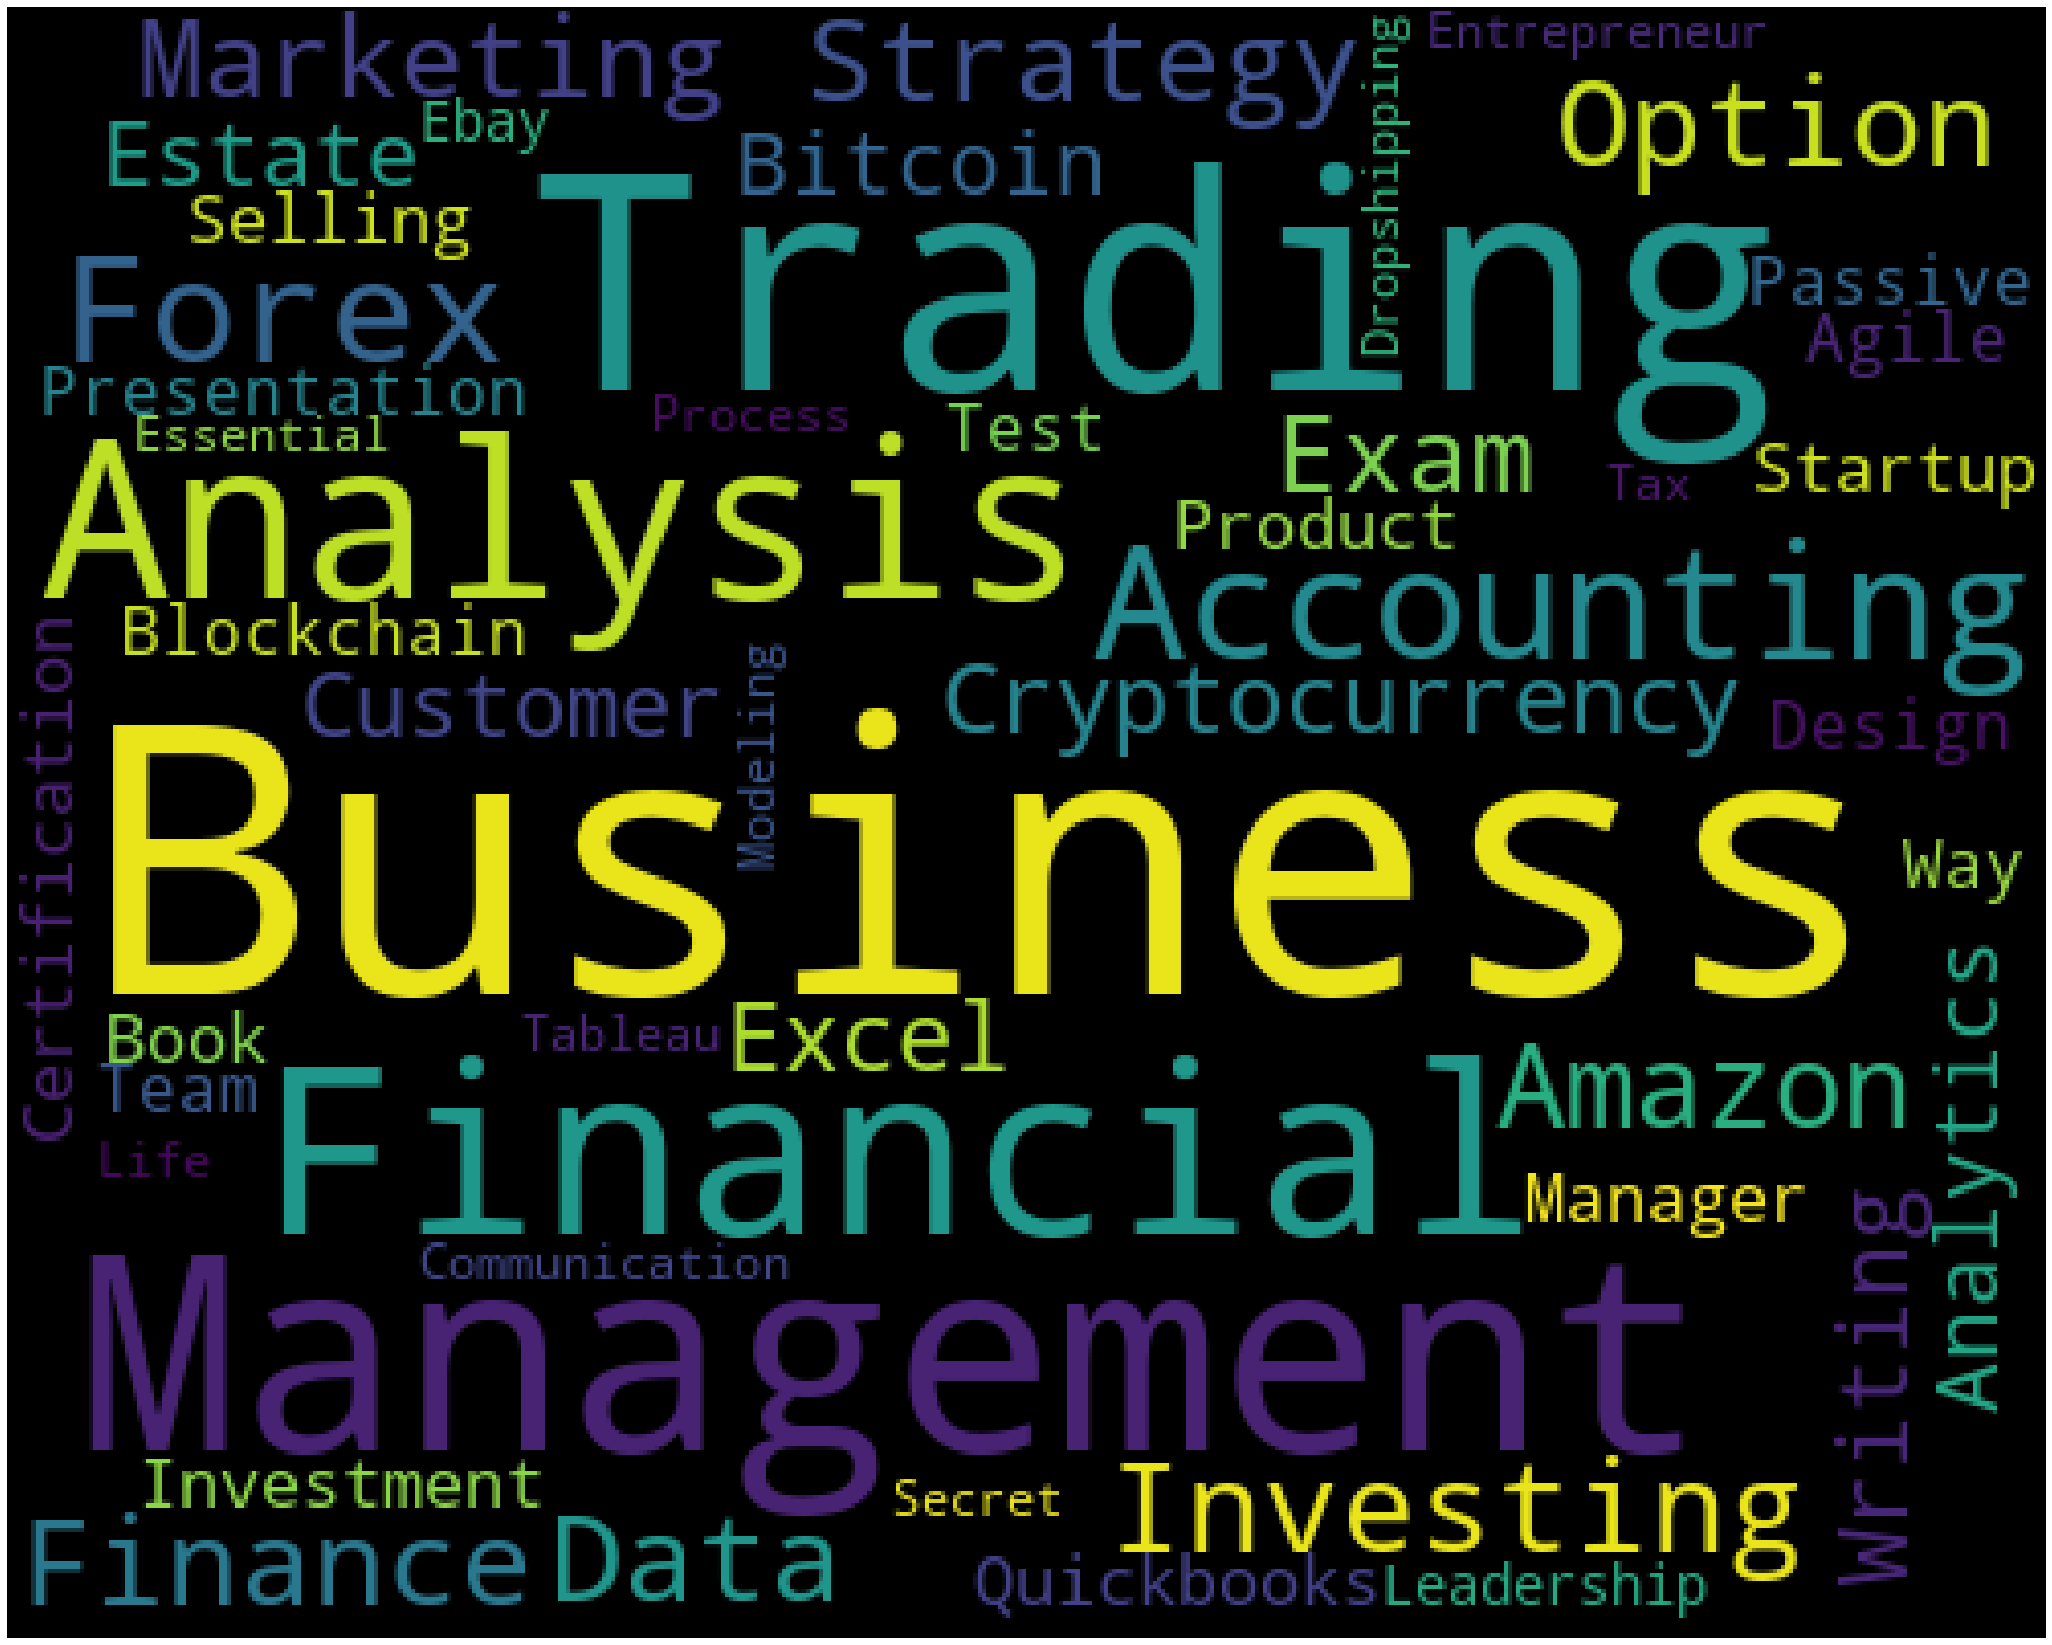

In [28]:
# Generate word cloud
wordcloud = WordCloud(width = 500, height = 400, random_state=0, background_color='black', collocations=False, max_words=50).generate(words_str_nr)
# Plot
plot_cloud(wordcloud)

In [29]:
categories = list(top_50_df['KW'])

print(categories)

['Business', 'Trading', 'Management', 'Financial', 'Analysis', 'Accounting', 'Forex', 'Investing', 'Data', 'Amazon', 'Strategy', 'Options', 'Finance', 'Marketing', 'Cryptocurrency', 'Excel', 'Writing', 'Estate', 'Analytics', 'Bitcoin', 'Quickbooks', 'Exam', 'Certification', 'Selling', 'Product', 'Customer', 'Blockchain', 'Passive', 'Investment', 'Agile', 'Design', 'Leadership', 'Ebay', 'Process', 'Life', 'Dropshipping', 'Tax', 'Tableau', 'Startup', 'Modeling', 'Microsoft', 'Fba', 'Communication', 'Corporate', 'Coaching', 'Book', 'Google', 'Python', 'Six', 'Team']


In [30]:
def convert_category(input_category):
  global categories
  result = ""
  for category in categories:
    if input_category.find(category) != -1:
       result = category
  return result if result else "Other" 

In [31]:
df6 = df5.copy()

df6['keyword'] = df6['keyword'].apply(convert_category)


In [32]:
df6.head(3)


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,language,raw_bow_list,words_list,words_list_s,words_str,words_str_s,keyword
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[The, Complete, SQL, Bootcamp, 2020:, Go, from...","[Complete, SQL, Bootcamp, 2020:, Go, Zero, Hero]","[Complete, Sql, Bootcamp, 2020:, Go, Zero, Hero]",Complete SQL Bootcamp 2020: Go Zero Hero,Complete Sql Bootcamp 2020: Go Zero Hero,Other
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[Tableau, 2020, A-Z:, Hands-On, Tableau, Train...","[Tableau, 2020, A-Z:, Hands-On, Tableau, Train...","[Tableau, 2020, A-z:, Hands-on, Tableau, Train...",Tableau 2020 A-Z: Hands-On Tableau Training Da...,Tableau 2020 A-z: Hands-on Tableau Training Da...,Tableau
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640",en,"[The, Complete, Financial, Analyst, Course, 2020]","[Complete, Financial, Analyst, Course, 2020]","[Complete, Financial, Analyst, Course, 2020]",Complete Financial Analyst Course 2020,Complete Financial Analyst Course 2020,Financial


In [33]:
df7 = df6.copy()

select_features = ['title', 'keyword','created', 'published_time','num_subscribers', 'avg_rating', 'avg_rating_recent', 'num_reviews', 'num_published_lectures', 'num_published_practice_tests', 'discount_price__amount', 'price_detail__amount']

df7 = df7[select_features]

df7.head(5)

,title,keyword,created,published_time,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
0,The Complete SQL Bootcamp 2020: Go from Zero t...,Other,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,295509,4.66019,4.67874,78006,84,0,455.0,8640.0
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,Tableau,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,209070,4.58956,4.60015,54581,78,0,455.0,8640.0
3,The Complete Financial Analyst Course 2020,Financial,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,245860,4.54407,4.53772,46447,338,0,455.0,8640.0
4,An Entire MBA in 1 Course:Award Winning Busine...,Business,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,374836,4.47080,4.47173,41630,83,0,455.0,8640.0
5,Microsoft Power BI - A Complete Introduction [...,Microsoft,2017-05-08T13:03:21Z,2017-05-15T18:48:54Z,124180,4.56228,4.57676,38093,275,0,455.0,8640.0


In [34]:
df7.shape


(11054, 12)

In [35]:
df8 = df7.copy()

df8 = df8.dropna()

df8.shape

(10104, 12)

In [36]:
df9 = df8.copy()

df9 = df9[df9['avg_rating'] != 0]
df9['created'] = df9['created'].apply(lambda x: x[:-10])
df9['published_time'] = df9['published_time'].apply(lambda x: x[:-10])

df9.head(3)

,title,keyword,created,published_time,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
0,The Complete SQL Bootcamp 2020: Go from Zero t...,Other,2016-02-14,2016-04-06,295509,4.66019,4.67874,78006,84,0,455.0,8640.0
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,Tableau,2016-08-22,2016-08-23,209070,4.58956,4.60015,54581,78,0,455.0,8640.0
3,The Complete Financial Analyst Course 2020,Financial,2015-10-23,2016-01-21,245860,4.54407,4.53772,46447,338,0,455.0,8640.0


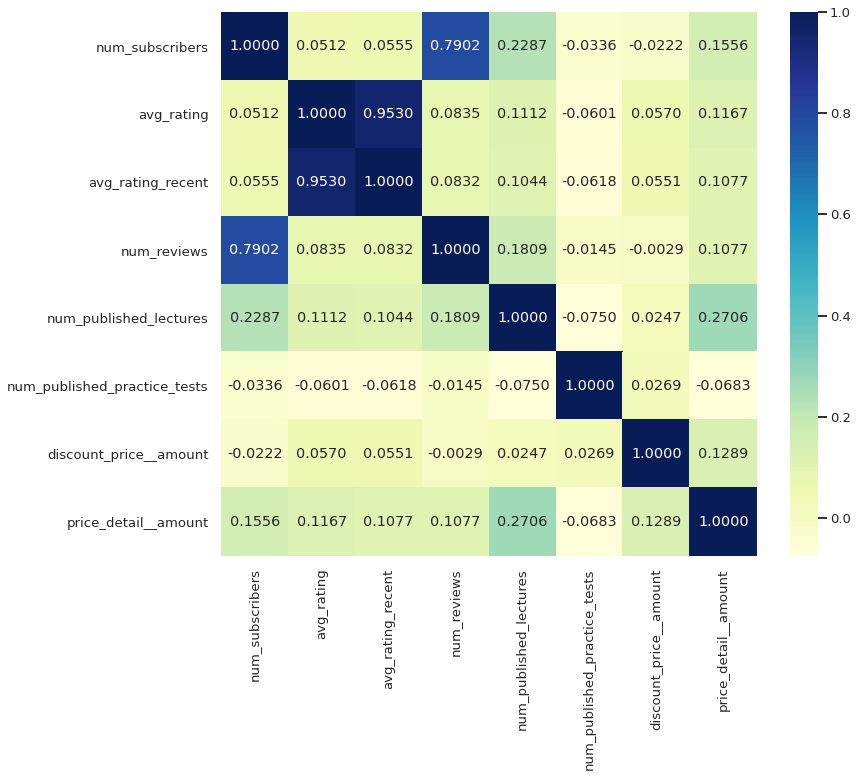

In [37]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=0.8)

sns.heatmap(df9.corr(), cmap='YlGnBu', annot=True, fmt=".4f")

In [38]:
df9.to_csv("udemy_accfin_clean.csv", index=False) 